In [78]:
import pandas as pd
import geopandas as gpd
import numpy as np

<Axes: >

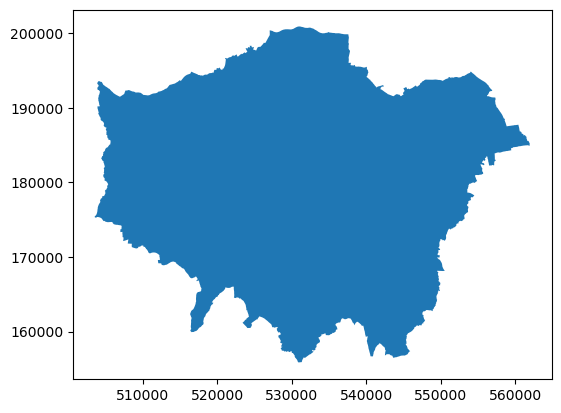

In [107]:
gla = gpd.read_file('data/gla/London_GLA_Boundary.shp')
gla.plot()

In [108]:
h9 = pd.read_csv("data/hex_OD_allactivity.csv.gz", compression="gzip")

In [ ]:
# H3 idx to Polygon
def h3_to_polygon(hex_id):
    polygon = Polygon([(lon, lat) for lat, lon in h3.cell_to_boundary(hex_id)] )
    return polygon

# polygons to H3 cells
hx = gla["geometry"].apply(lambda x: h3.geo_to_cells(x, res=8)).explode()
hx  

# H3 back to Polygons
hex_geometries = hx.apply(h3_to_polygon)

# geodf
df_hex_individual = gpd.GeoDataFrame(geometry=hex_geometries, crs=df.crs)


df_hex_individual.plot()
plt.show()

In [138]:
london_polygon = gla.geometry.iloc[0]

h3_poly = h3.LatLngPoly(outer=list(london_polygon.exterior.coords), *london_polygon.interiors)

cells = h3.h3shape_to_cells(h3shape=h3_poly, res=9)

H3MemoryAllocError: 

In [125]:
import h3
from shapely.geometry import Polygon

london_polygon = gla.geometry.iloc[0]

h3_poly = h3.LatLngPoly(outer=list(poly.exterior.coords), *poly.interiors)

cells = h3.h3shape_to_cells(h3shape=h3_poly, res=7)

# Step 4: Set the H3 resolution 9.
h3_resolution = 9

london_coords_reversed = [(c[1], c[0]) for c in london_polygon.exterior.coords]
h3_indexes = h3.h3shape_to_cells(london_coords_reversed, h3_resolution)
    
# Step 6: Convert the H3 polygons to a GeoDataFrame.
# This loop gets the boundary for each H3 index and creates a polygon.
geometries = []
for h3_index in h3_indexes:
    hex_boundary = h3.h3_to_geo_boundary(h3_index, geo_json=True)
    geometries.append(Polygon(hex_boundary))

h3_gdf = gpd.GeoDataFrame(
    {'h3_index': list(h3_indexes)},
    geometry=geometries,
    crs='EPSG:4326'
)

# Step 7: Plot the H3 grid.
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the London boundary
london_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.5)

# Plot the H3 grid on top
h3_gdf.plot(
    ax=ax,
    edgecolor='white',
    linewidth=0.5,
    facecolor='lightblue'
)

# Add labels and a title
ax.set_title(f"H3 Hexagon Grid of London (Resolution {h3_resolution})")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


ValueError: Unrecognized type: <class 'list'>

<Axes: >

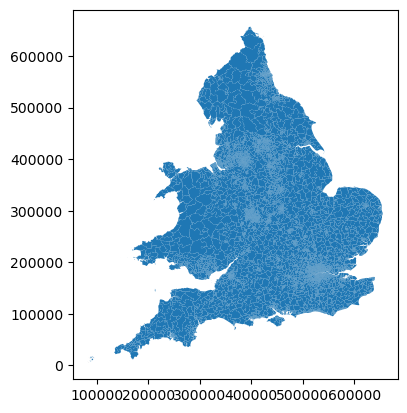

In [86]:
msoa_map = gpd.read_file('data/msoa_2021/MSOA_2021_EW_BGC_V3.shp')
msoa_map.plot()

In [87]:
msoa_all = pd.read_csv("data/msoa_OD_allactivity.csv.gz", compression="gzip")

In [92]:
# To select rows where o_msoa is equal to d_msoa, you can use a boolean condition.
intra_msoa_trips = msoa_all[msoa_all['o_msoa'] == msoa_all['d_msoa']]
intra_msoa_trips

,o_msoa,d_msoa,num_trips
0,E02007005,E02007005,28854
1,E02000524,E02000524,27280
2,E02000001,E02000001,22293
3,E02000977,E02000977,21419
4,E02007099,E02007099,21154
...,...,...,...
94596,E02000347,E02000347,95
107143,E02000729,E02000729,80
108362,E02002282,E02002282,79
113722,E02000414,E02000414,74


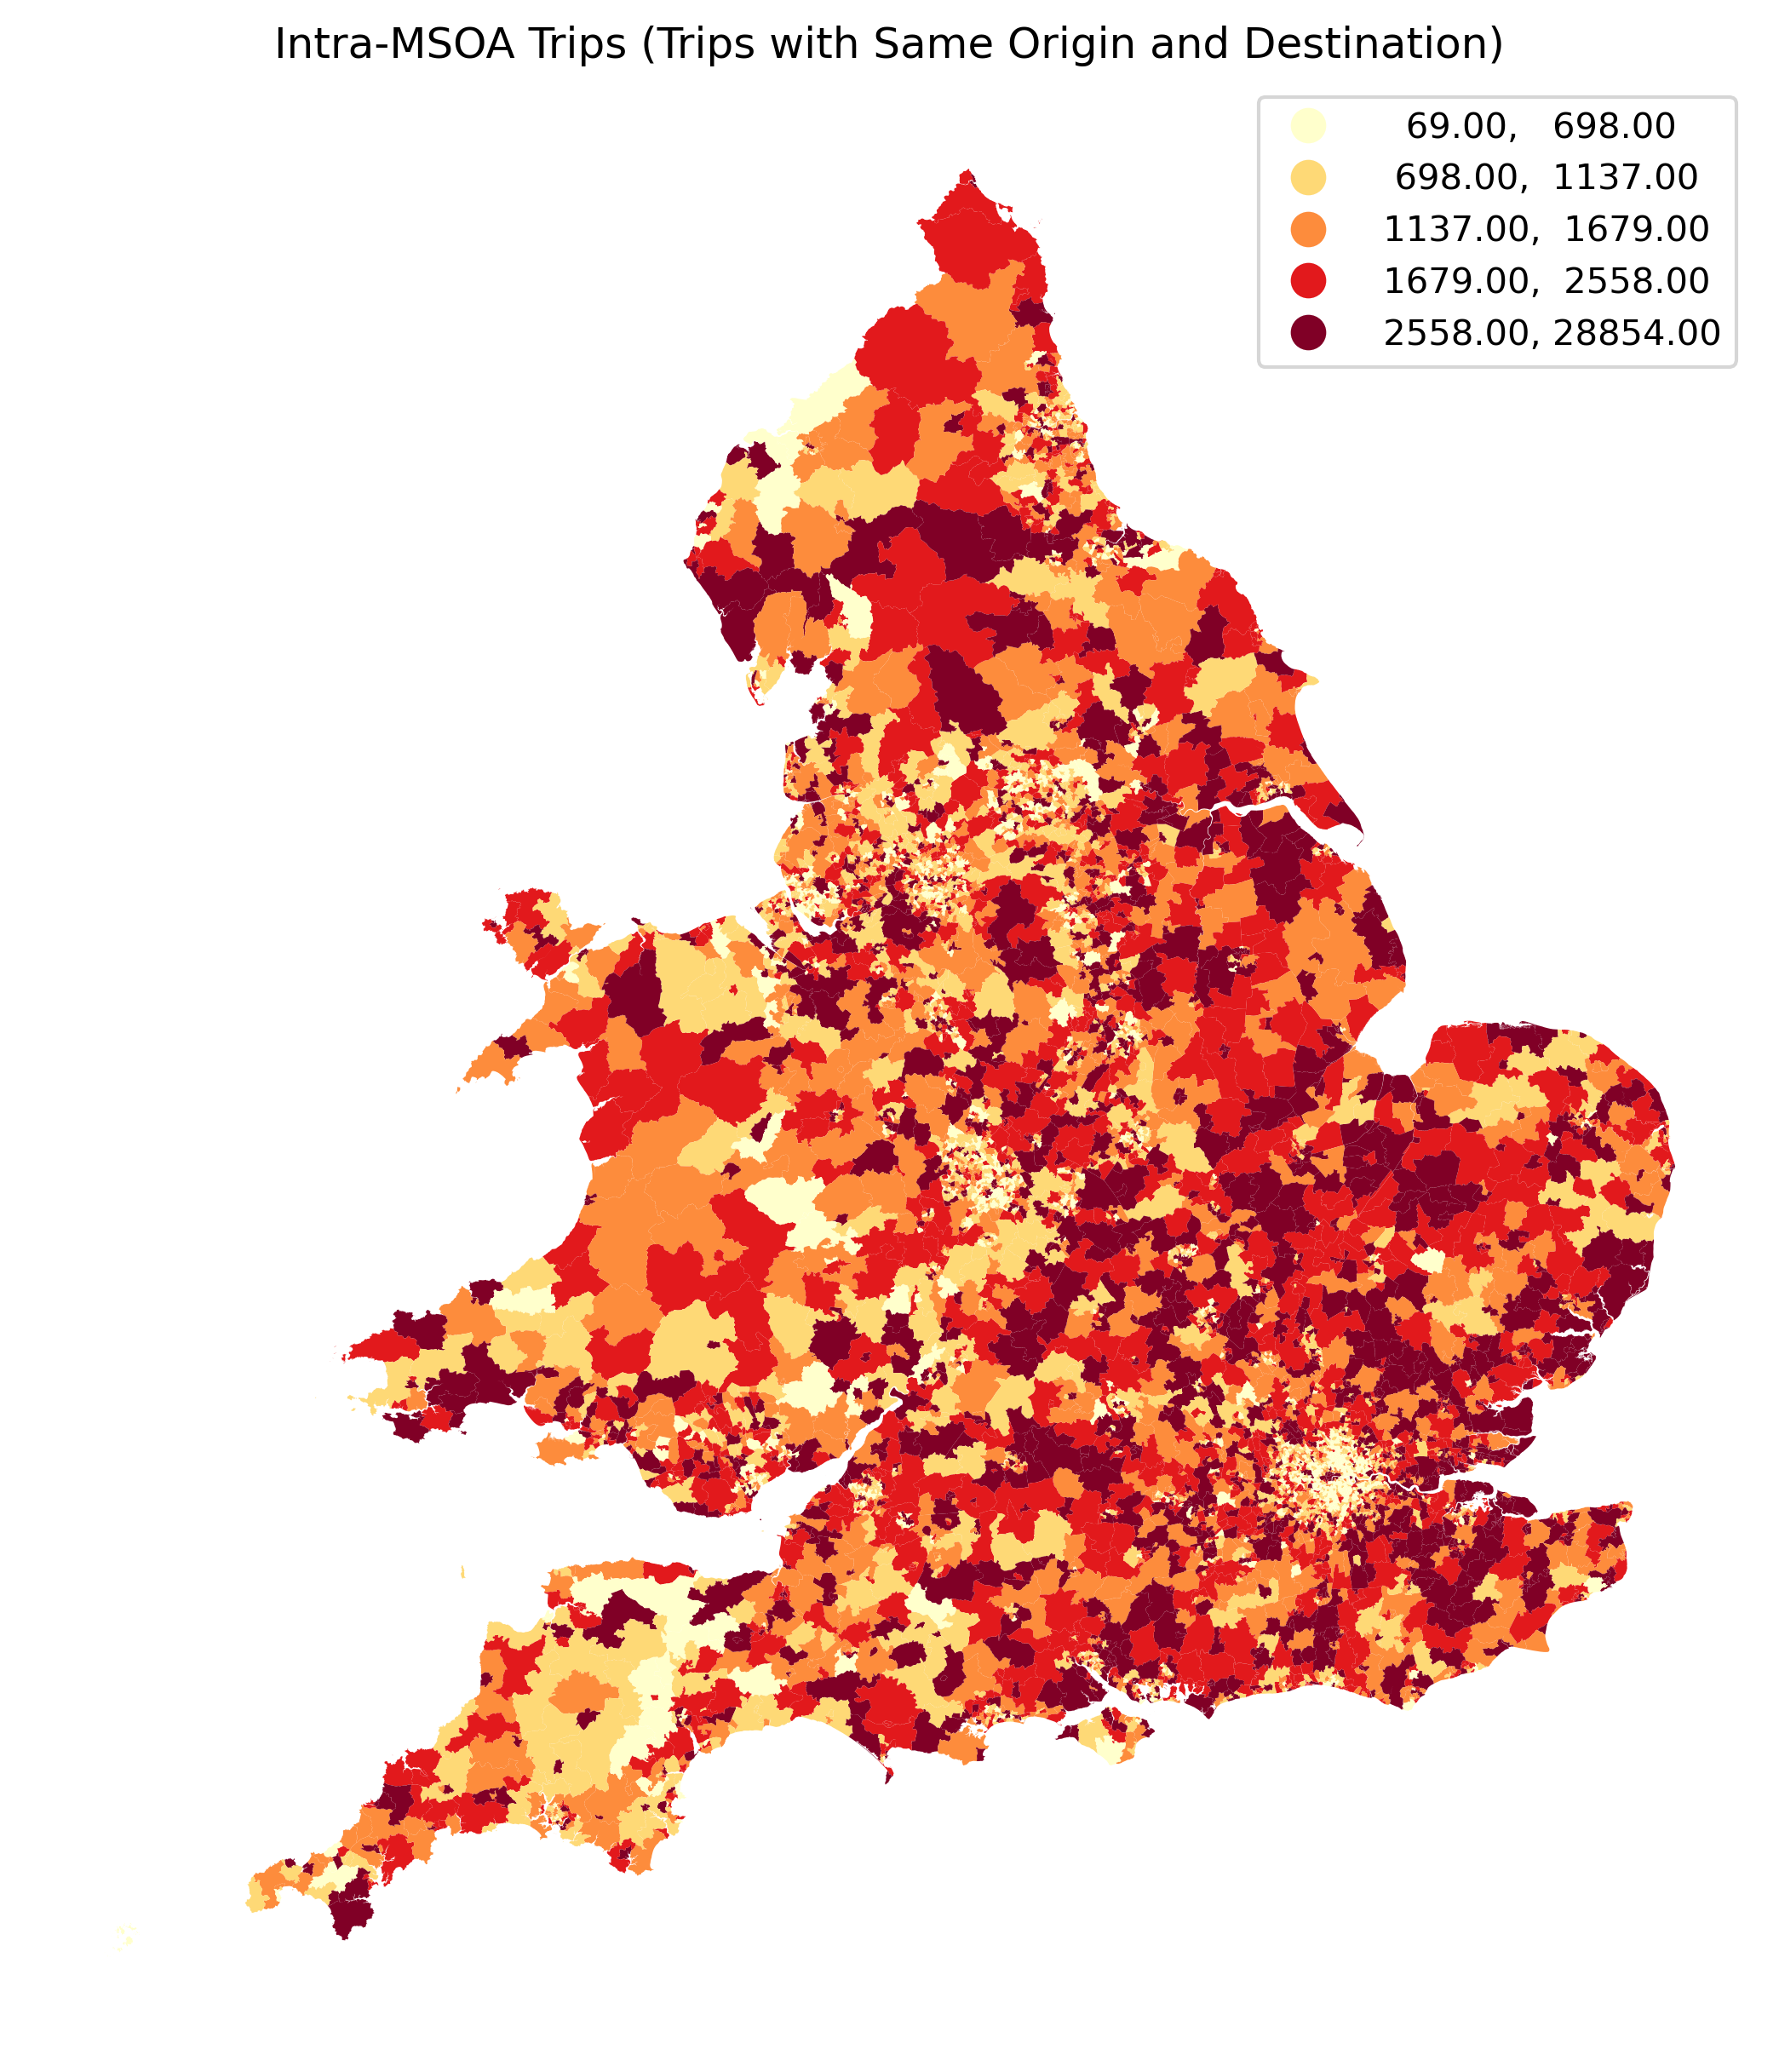

In [104]:
merged_gdf = msoa_map.merge(
    intra_msoa_trips,
    left_on='MSOA21CD',
    right_on='o_msoa',
    how='left'
)

# Fill any NaN values in `num_trips` with 0 after the merge.
merged_gdf['num_trips'] = merged_gdf['num_trips'].fillna(0)

# Create the map colored by num_trips.
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=300)
merged_gdf.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    edgecolor='None',
    linewidth=0.5,
    scheme='Quantiles'
)

ax.set_title('Intra-MSOA Trips (Trips with Same Origin and Destination)')
ax.set_axis_off()  # Turn off the axes for a cleaner map plot

# Display the map
plt.show()

In [ ]:
merged_gdf.explore(color="Red",tiles='cartodbpositron', tooltip=['id','label','latitude','longitude'], 
                    width=750, height=500)
merged_gdf.explore(
    column='num_trips',
    tiles='cartodbpositron',
    cmap='YlOrRd',
    scheme='Quantiles',
    tooltip=['MSOA21CD', 'num_trips'],
    legend_kwds={'caption': 'Number of Trips'}
)

In [91]:
msoa_all.iloc[0]

o_msoa       E02007005
d_msoa       E02007005
num_trips        28854
Name: 0, dtype: object

In [4]:
pd.read_csv("data/msoa_OD_travel2work.csv", compression="gzip")

,MSOA21CD_home,county_home,MSOA21CD_work,county_work,count
0,E02000001,GREATER_LONDON_AUTHORITY,E02000001,GREATER_LONDON_AUTHORITY,23
1,E02000001,GREATER_LONDON_AUTHORITY,E02000022,GREATER_LONDON_AUTHORITY,1
2,E02000001,GREATER_LONDON_AUTHORITY,E02000042,GREATER_LONDON_AUTHORITY,1
3,E02000001,GREATER_LONDON_AUTHORITY,E02000065,GREATER_LONDON_AUTHORITY,1
4,E02000001,GREATER_LONDON_AUTHORITY,E02000097,GREATER_LONDON_AUTHORITY,1
...,...,...,...,...,...
323609,W02000428,Abertawe,W02000369,Caerdydd,4
323610,W02000428,Abertawe,W02000384,Caerdydd,2
323611,W02000428,Abertawe,W02000398,Caerdydd,4
323612,W02000428,Abertawe,W02000417,Castell-nedd Port Talbot,2


In [25]:
traject_sample = pd.read_csv("data/trajectory_GLA_sample5000.csv.gz", compression="gzip")
traject_sample

# 1.for each user, calculate the total duration of each activity type, and get the most common activity to least common activity,
#   can be separate by weekday/weekend
# 1.1 then maybe we can do cluster based on the total activit duration
# 2. make box plot of each activity type, with y-axis as duration. also can be separate by weekday/weekend.
# 3. we can aggregate activity by day, and get the count of each activity.

,userid,start_time,end_time,duration,loc_msoa,activity
0,6B46AF01384055689E5FF203A19FFDFF,2021-11-01 10:30:00,2021-11-02 19:15:00,1963.766667,E02000275,Work
1,6B46AF01384055689E5FF203A19FFDFF,2021-11-02 21:30:00,2021-11-03 23:30:00,1567.716667,E02000770,Home
2,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 10:15:00,2021-11-05 11:00:00,30.266667,E02007019,Shopping_2
3,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 12:45:00,2021-11-05 15:15:00,140.216667,E02000770,Home
4,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 16:30:00,2021-11-05 17:15:00,40.033333,E02000772,Shopping_2
...,...,...,...,...,...,...
575105,6B2102F15AEAC07546E3E9488423AB2C,2021-11-27 14:30:00,2021-11-27 14:45:00,2.083333,E02004979,Others
575106,6B2102F15AEAC07546E3E9488423AB2C,2021-11-27 15:45:00,2021-11-27 16:00:00,10.066667,E02000436,Others
575107,6B2102F15AEAC07546E3E9488423AB2C,2021-11-28 12:30:00,2021-11-28 12:30:00,3.100000,E02000454,Others
575108,6B2102F15AEAC07546E3E9488423AB2C,2021-11-28 14:15:00,2021-11-28 14:30:00,9.933333,E02000436,Others


## Add weekday information

In [32]:
traject_sample['start_time'] = pd.to_datetime(traject_sample['start_time'])
# Extract the full name of the day of the week.
traject_sample['day_of_week'] = traject_sample['start_time'].dt.day_name()
# Create a boolean column to identify weekends.
traject_sample['is_weekend'] = np.where(traject_sample['day_of_week'].isin(['Saturday', 'Sunday']), 'weekend', 'weekday')

In [76]:
traject_sample

,userid,start_time,end_time,duration,loc_msoa,activity,day_of_week,is_weekend
0,6B46AF01384055689E5FF203A19FFDFF,2021-11-01 10:30:00,2021-11-02 19:15:00,1963.766667,E02000275,Work,Monday,weekday
1,6B46AF01384055689E5FF203A19FFDFF,2021-11-02 21:30:00,2021-11-03 23:30:00,1567.716667,E02000770,Home,Tuesday,weekday
2,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 10:15:00,2021-11-05 11:00:00,30.266667,E02007019,Shopping_2,Friday,weekday
3,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 12:45:00,2021-11-05 15:15:00,140.216667,E02000770,Home,Friday,weekday
4,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 16:30:00,2021-11-05 17:15:00,40.033333,E02000772,Shopping_2,Friday,weekday
...,...,...,...,...,...,...,...,...
575105,6B2102F15AEAC07546E3E9488423AB2C,2021-11-27 14:30:00,2021-11-27 14:45:00,2.083333,E02004979,Others,Saturday,weekend
575106,6B2102F15AEAC07546E3E9488423AB2C,2021-11-27 15:45:00,2021-11-27 16:00:00,10.066667,E02000436,Others,Saturday,weekend
575107,6B2102F15AEAC07546E3E9488423AB2C,2021-11-28 12:30:00,2021-11-28 12:30:00,3.100000,E02000454,Others,Sunday,weekend
575108,6B2102F15AEAC07546E3E9488423AB2C,2021-11-28 14:15:00,2021-11-28 14:30:00,9.933333,E02000436,Others,Sunday,weekend


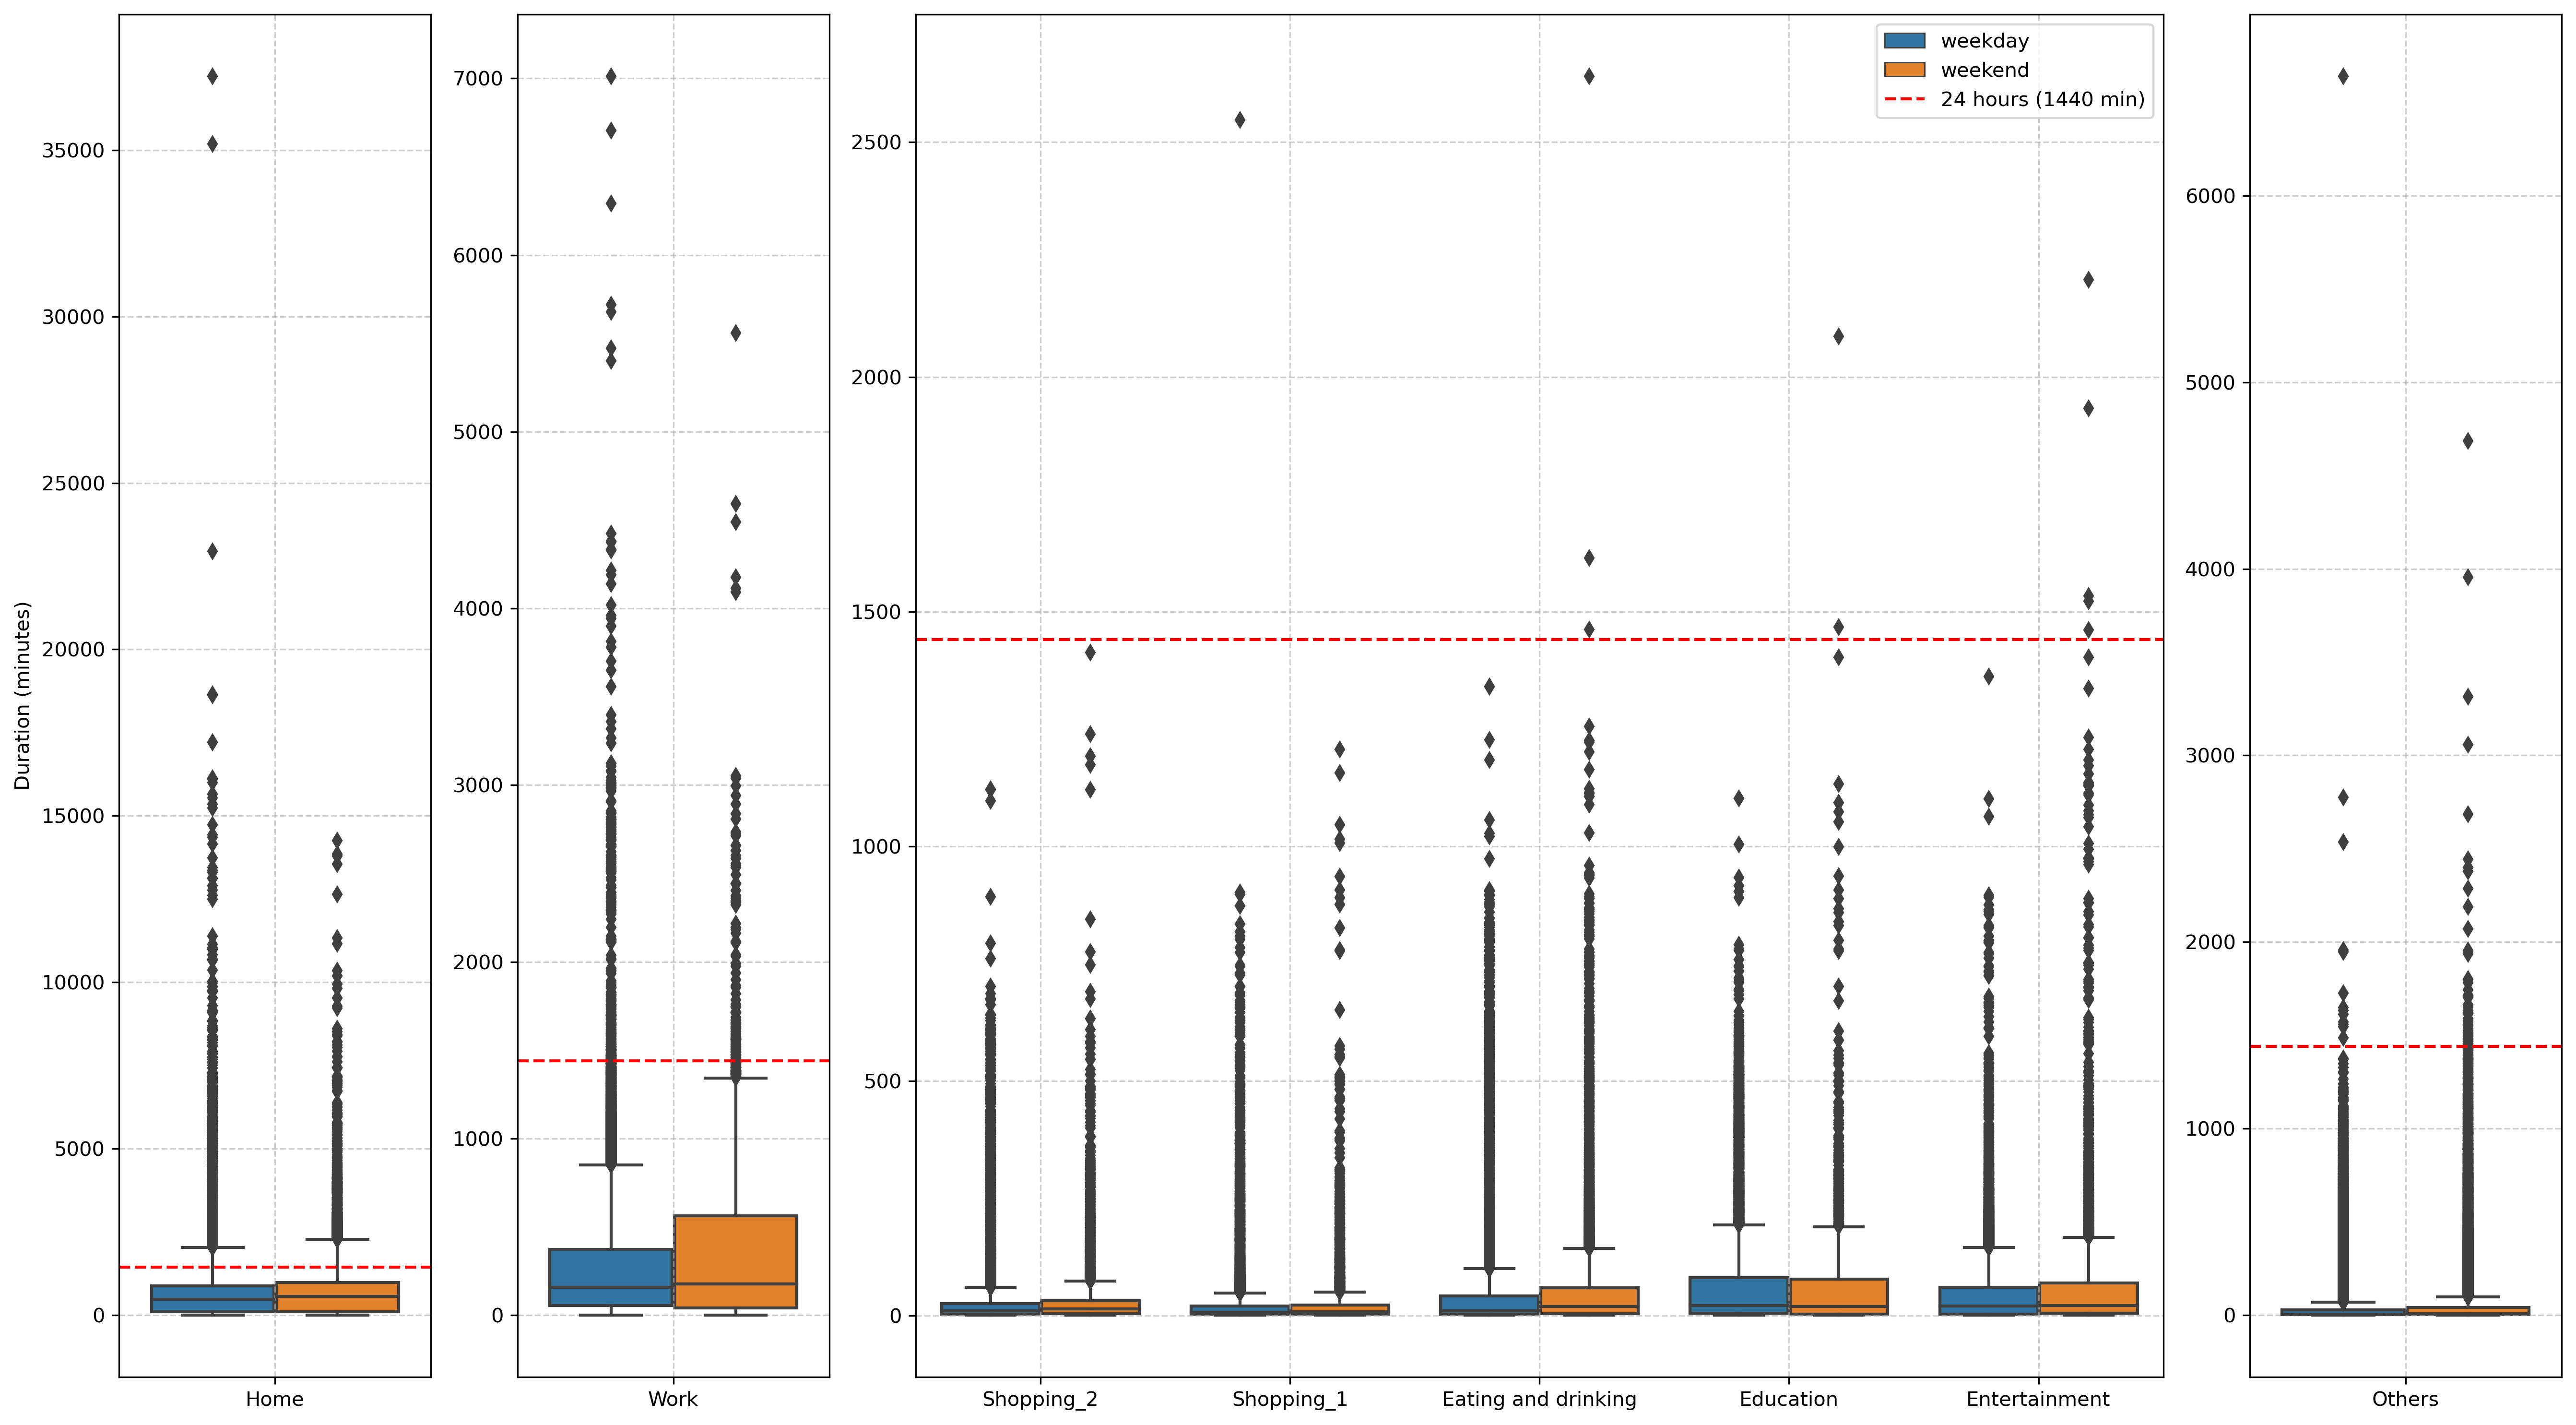

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

home_df = traject_sample[traject_sample['activity'] == 'Home']
work_df = traject_sample[traject_sample['activity'] == 'Work']
other_df = traject_sample[traject_sample['activity'] == 'Others']
other_activities_df = traject_sample[(traject_sample['activity'] != 'Home') & (traject_sample['activity'] != 'Work') & (traject_sample['activity'] != 'Others')] 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 1, 4, 1]}, dpi=300)

# Create box plot
sns.boxplot(x='activity', y='duration', hue='is_weekend', data=home_df, ax=ax1)
ax1.set_ylabel('Duration (minutes)')
ax1.set_xlabel('')
ax1.legend().remove()
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')


sns.boxplot(x='activity', y='duration', hue='is_weekend', data=work_df, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend().remove()
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')

sns.boxplot(x='activity', y='duration', hue='is_weekend', data=other_activities_df, ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True, linestyle='--', alpha=0.6)
ax3.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')
ax3.legend()

sns.boxplot(x='activity', y='duration', hue='is_weekend', data=other_df, ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.legend().remove()
ax4.grid(True, linestyle='--', alpha=0.6)
ax4.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')

plt.tight_layout()
plt.show()


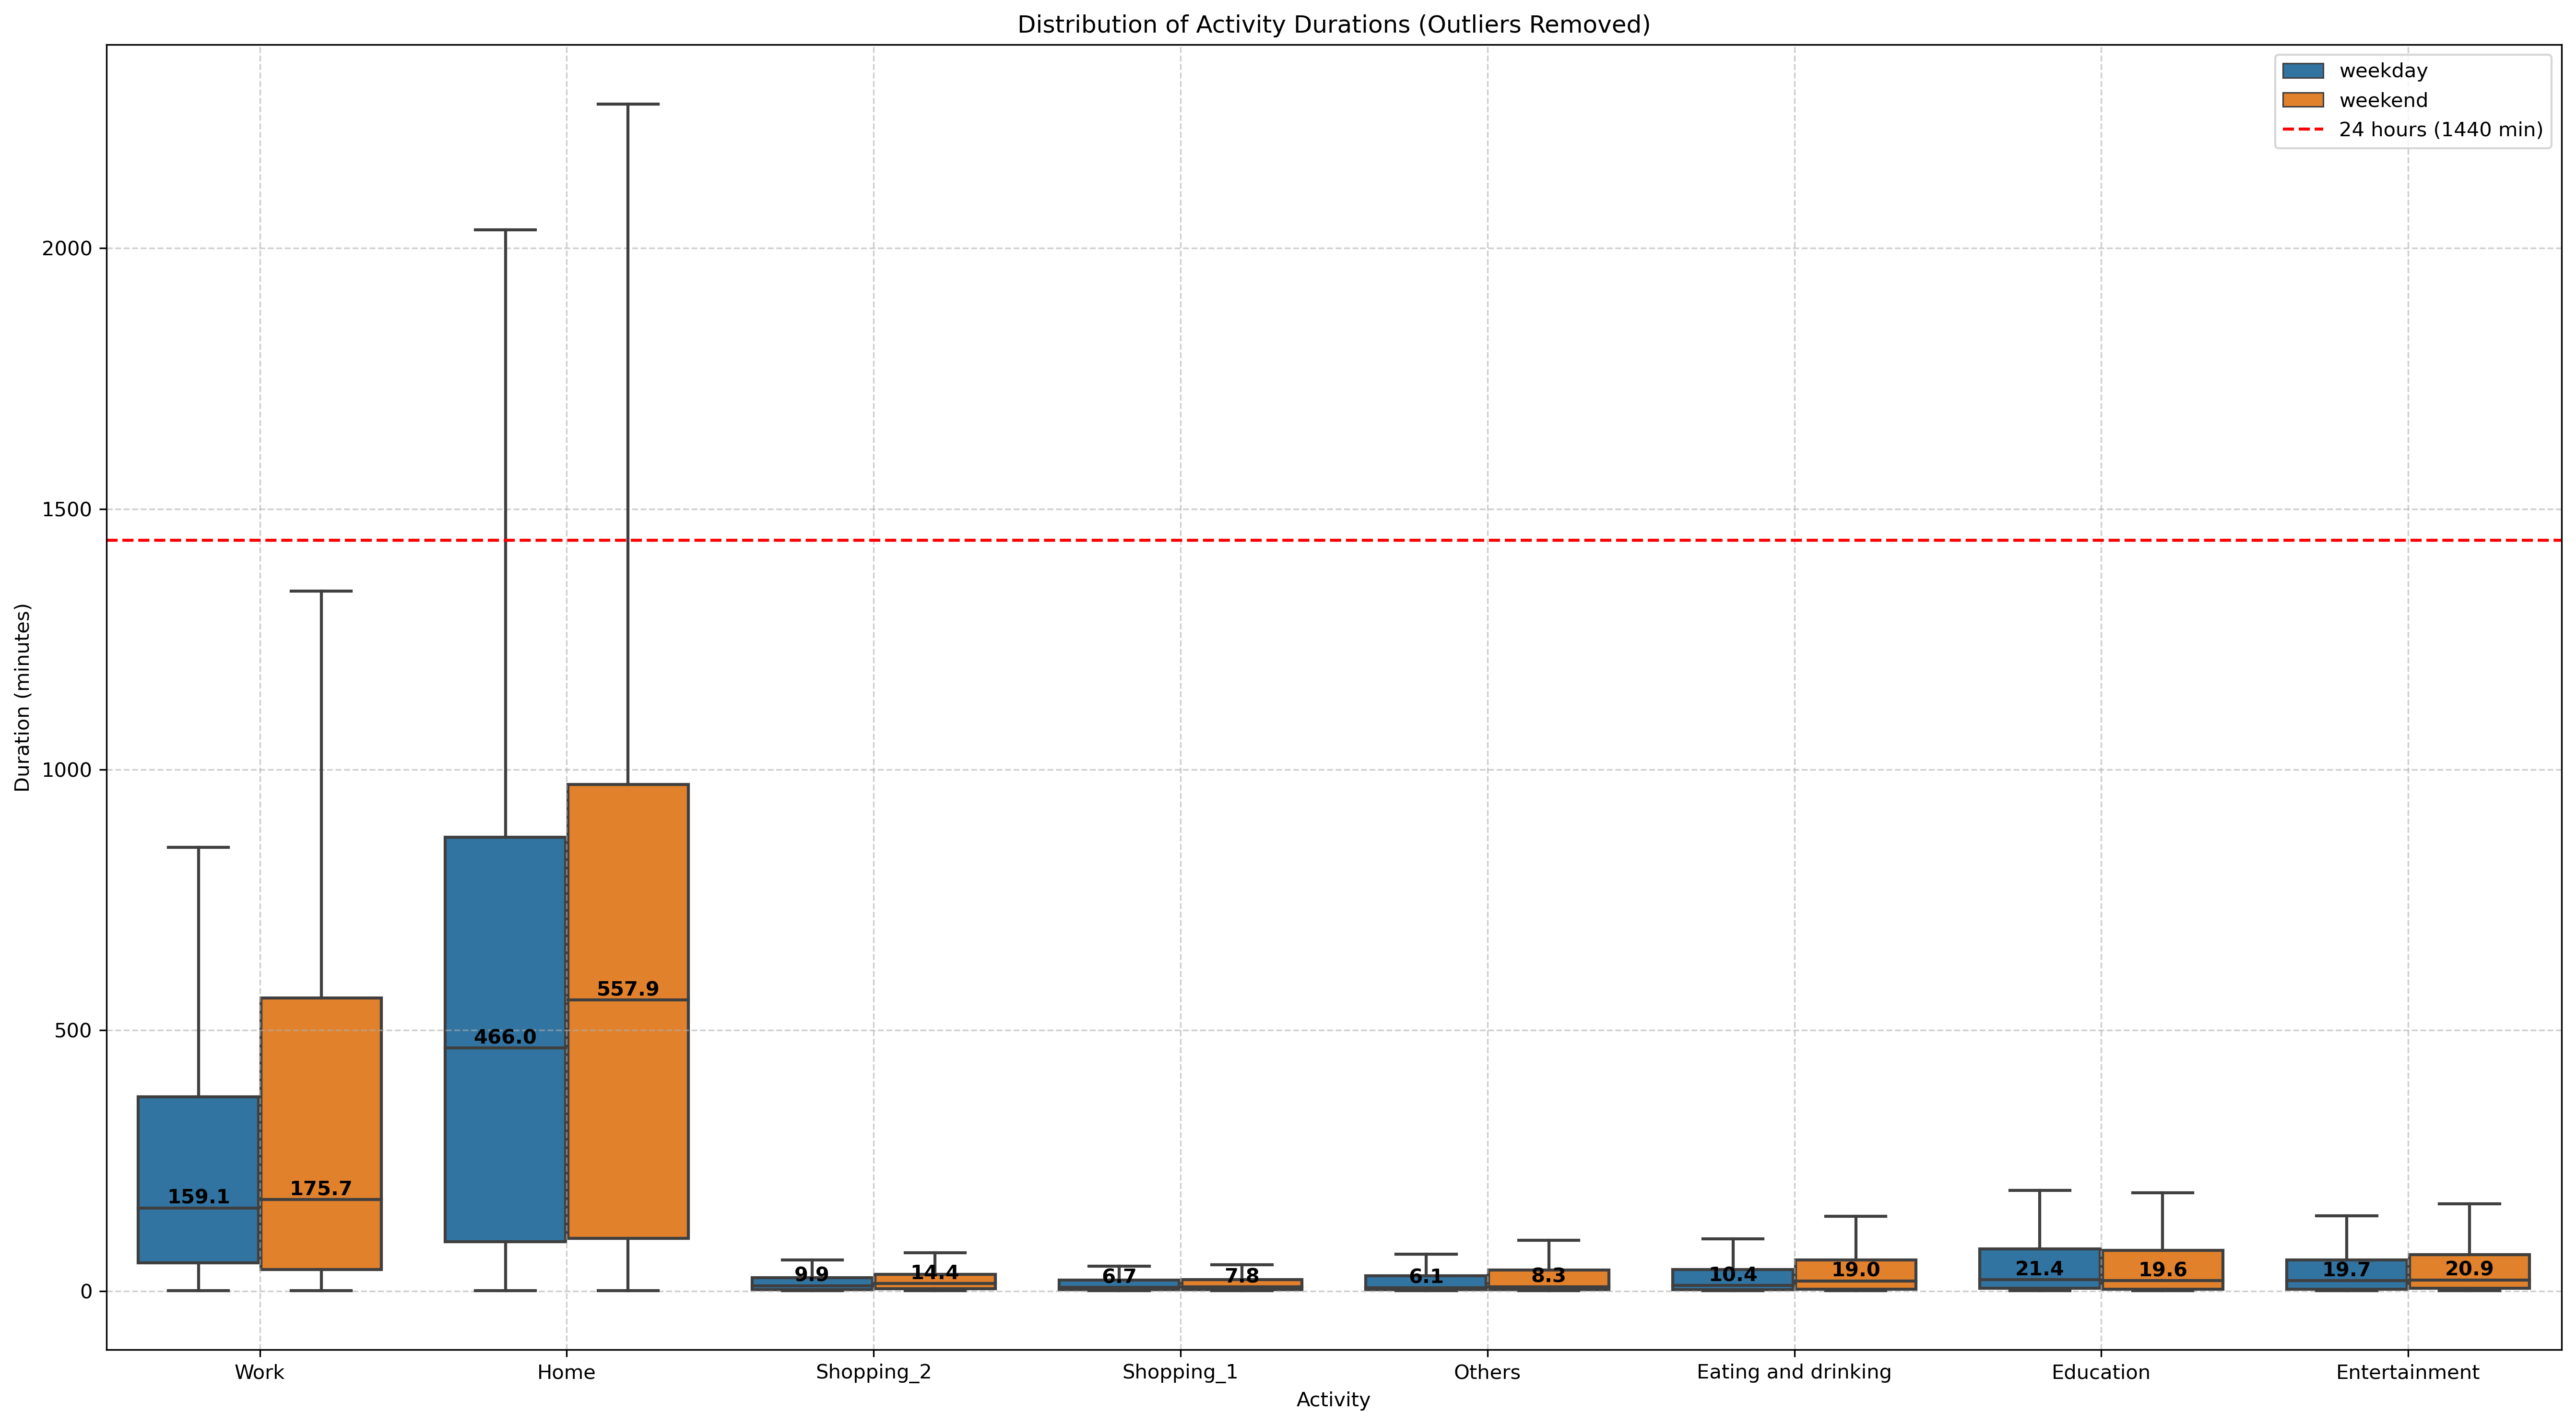

In [75]:
plt.figure(figsize=(18, 10), dpi=300)
sns.boxplot(x='activity', y='duration', hue='is_weekend', data=traject_sample, showfliers=False)

# Add the 24-hour line for context.
plt.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')

# Step 4: Add median values as text annotations.
# Iterate through each activity and day type to calculate the median and annotate.
for i, activity in enumerate(traject_sample['activity'].unique()):
    for j, day_type in enumerate(traject_sample['is_weekend'].unique()):
        # Filter the DataFrame for the current group
        group_data = traject_sample[(traject_sample['activity'] == activity) & (traject_sample['is_weekend'] == day_type)]
        
        # Check if the group has data before calculating quantiles
        if not group_data.empty:
            median = group_data['duration'].median()

            # Determine the x-position for the annotation.
            # The x-position of the box depends on its order in the plot.
            box_pos = i - 0.2 if day_type == 'weekday' else i + 0.2
            
            # Annotate the plot with the values
            plt.text(box_pos, median, f'{median:.1f}', ha='center', va='bottom', fontsize=10, color='black',weight='bold')

plt.title('Distribution of Activity Durations (Outliers Removed)')
plt.xlabel('Activity')
plt.ylabel('Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)

# Create a single legend for the entire figure.
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)

plt.tight_layout()
plt.show()

In [37]:
traject_sample.iloc[0]

userid         6B46AF01384055689E5FF203A19FFDFF
start_time                  2021-11-01 10:30:00
end_time                    2021-11-02 19:15:00
duration                            1963.766667
loc_msoa                              E02000275
activity                                   Work
day_of_week                              Monday
is_weekend                              weekday
Name: 0, dtype: object

In [24]:
print(len(set(traject_sample.userid)))
print(traject_sample.activity.unique())

5000
['Work' 'Home' 'Shopping_2' 'Shopping_1' 'Others' 'Eating and drinking'
 'Education' 'Entertainment']
